In [2]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from importlib import reload
plt.rcParams["legend.loc"] = "upper left"
plt.rcParams['text.usetex'] = True

from files.gradient_approximation import *
from files.optimizers import *
from files.sets import *
from files.utils import *
from files.run_experiments import *

%load_ext autoreload
%autoreload 2

In [ ]:
# Для тестирования

def learning_rate(k):
    return 1 / 100

TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**2)
GD.optimize()

make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

## None-stochastic FW LogReg on L1-ball (Mushrooms)

In [3]:
func_name = "LogReg"
sett = L1Ball(radius=1)

d, args = init_experiment(func_name, dataset="Mushrooms")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [36]:
def learning_rate_jaguar(k):
    return 1 / (k + 150)

def learning_rate_lame(k):
    return 1 / (k + 1000)

def learning_rate_turtle(k):
    return 1 / (k + 5)

In [37]:
oracle = ZO_oracle(func_name, oracle_mode="tpf", args=args)

In [38]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [00:19<00:00,  2.32it/s]


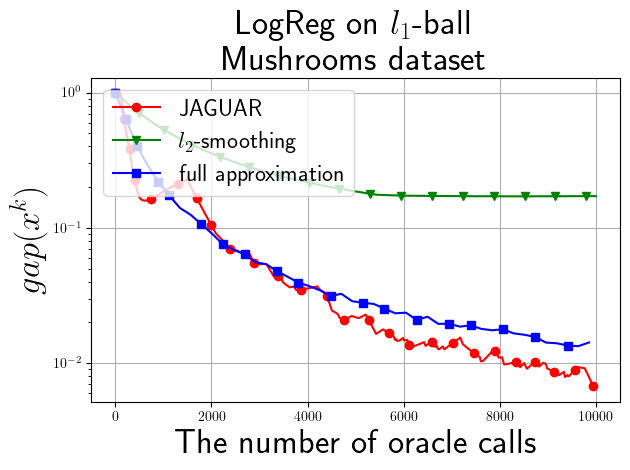

In [39]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_LogReg_L1_Mushrooms")

## None-stochastic FW LogReg on L1-ball (MNIST)

In [40]:
func_name = "LogReg"
sett = L1Ball(radius=1)

d, args = init_experiment(func_name, dataset="MNIST")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [60]:
def learning_rate_jaguar(k):
    return 1 / (k + 10)

def learning_rate_lame(k):
    return 1 / (k + 200)

def learning_rate_turtle(k):
    return 1 / (k + 2)

In [61]:
oracle = ZO_oracle(func_name, oracle_mode="tpf", args=args)

In [64]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [01:45<00:00, 17.62s/it]


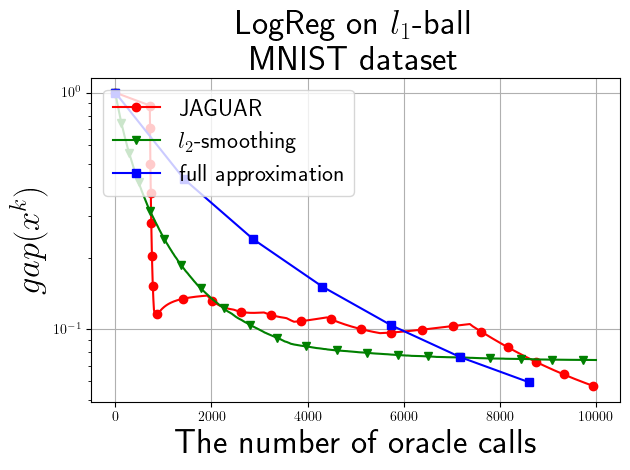

In [65]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_LogReg_L1_MNIST")

## None-stochastic FW Reg on L1-ball

In [66]:
func_name = "Reg"
sett = L1Ball(radius=1)
seed = 42
d = 200
L = 1000
mu = 1

d, args = init_experiment(func_name, d=d, L=L, mu=mu, seed=seed)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [121]:
def learning_rate_jaguar(k):
    return 1 / (k + 2000)

def learning_rate_lame(k):
    return 1 / (k + 20)

def learning_rate_turtle(k):
    return 1 / (k + 8)

In [122]:
oracle = ZO_oracle(func_name, oracle_mode="tpf", args=args)

In [123]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**5, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████| 250/250 [00:02<00:00, 88.03it/s]


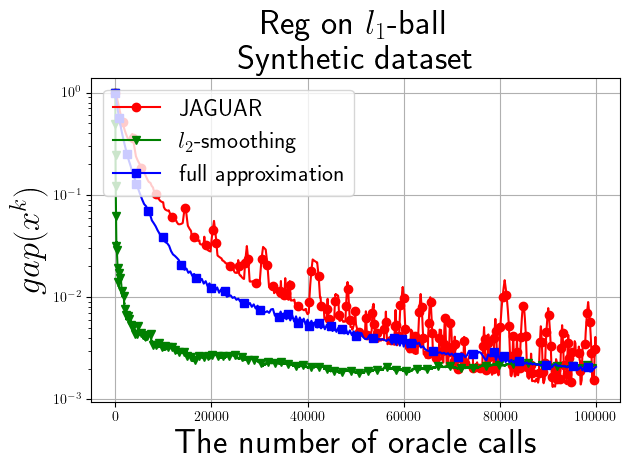

In [124]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_Reg_L1")

## None-stochastic FW SVM on L1-ball (Mushrooms)

In [128]:
func_name = "SVM"
sett = L1Ball(radius=1)

d, args = init_experiment(func_name, dataset="Mushrooms", alpha=2)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [151]:
def learning_rate_jaguar(k):
    return 1 / (k + 1000)

def learning_rate_lame(k):
    return 1 / (k + 200)

def learning_rate_turtle(k):
    return 1 / (k + 12)

In [152]:
oracle = ZO_oracle(func_name, oracle_mode="tpf", args=args)

In [159]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=3500, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 15/15 [00:00<00:00, 37.67it/s]


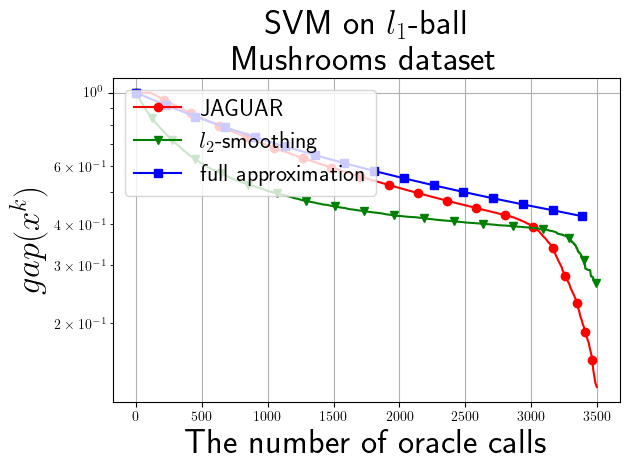

In [160]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_SVM_L1_Mushrooms")

## None-stochastic FW SVM on L1-ball (MNIST)

In [161]:
func_name = "SVM"
sett = L1Ball(radius=1)

d, args = init_experiment(func_name, dataset="MNIST", alpha=2)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [185]:
def learning_rate_jaguar(k):
    return 1 / (k + 500)

def learning_rate_lame(k):
    return 1 / (k + 25)

def learning_rate_turtle(k):
    return 1 / (k + 2)

In [186]:
oracle = ZO_oracle(func_name, oracle_mode="tpf", args=args)

In [189]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=4900, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 3/3 [00:03<00:00,  1.07s/it]


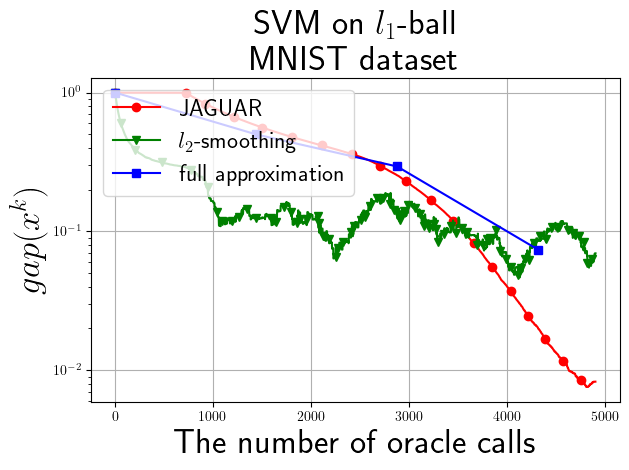

In [190]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_SVM_L1_MNIST")

## Stochastic OPF FW LogReg on L1-ball (Mushrooms)

In [383]:
func_name = "LogReg"
sett = L1Ball(radius=1)
sigma = 1

d, args = init_experiment(func_name, dataset="Mushrooms")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [384]:
def learning_rate_jaguar(k):
    return 1 / (k + 10)

def learning_rate_lame(k):
    return 1 / (k + 20)

def learning_rate_turtle(k):
    return 1 / (k + 10)

In [389]:
def momentum_k(k):
    return k / (2 * k + 10)

In [390]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [391]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=5 * 10**3, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 22/22 [00:10<00:00,  2.15it/s]


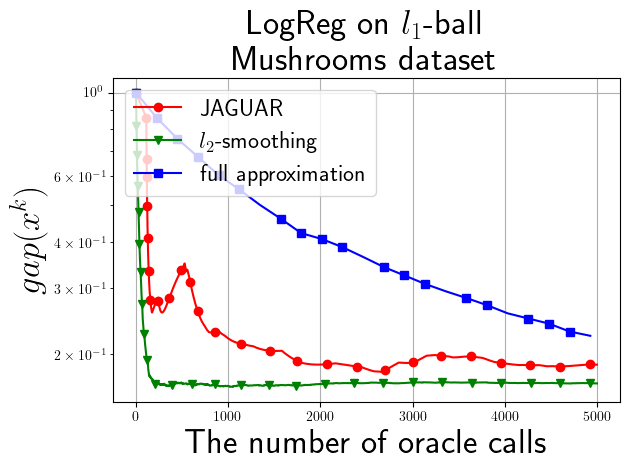

In [392]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_LogReg_L1_Mushrooms")

## Stochastic OPF FW LogReg on L1-ball (MNIST)

In [393]:
func_name = "LogReg"
sett = L1Ball(radius=1)
sigma = 1

d, args = init_experiment(func_name, dataset="MNIST")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [399]:
def learning_rate_jaguar(k):
    return 1 / (k + 100)

def learning_rate_lame(k):
    return 1 / (k + 50)

def learning_rate_turtle(k):
    return 1 / (k + 3)

In [400]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [401]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [402]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=5 * 10**3, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 3/3 [00:52<00:00, 17.59s/it]


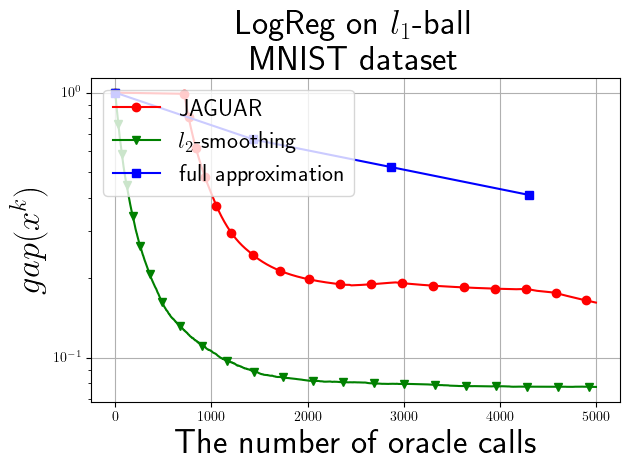

In [403]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_LogReg_L1_MNIST")

## Stochastic OPF FW Reg on L1-ball

In [404]:
func_name = "Reg"
sett = L1Ball(radius=1)
seed = 101
d = 200
L = 1000
mu = 1
sigma = 1

d, args = init_experiment(func_name, d=d, L=L, mu=mu, seed=seed)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [466]:
def learning_rate_jaguar(k):
    return 1 / (2 * k + 1000)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return 1 / (k + 6)

In [468]:
def momentum_k(k):
    return 0.95 * k / (k + 50)

In [469]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [470]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 25/25 [00:00<00:00, 78.06it/s]


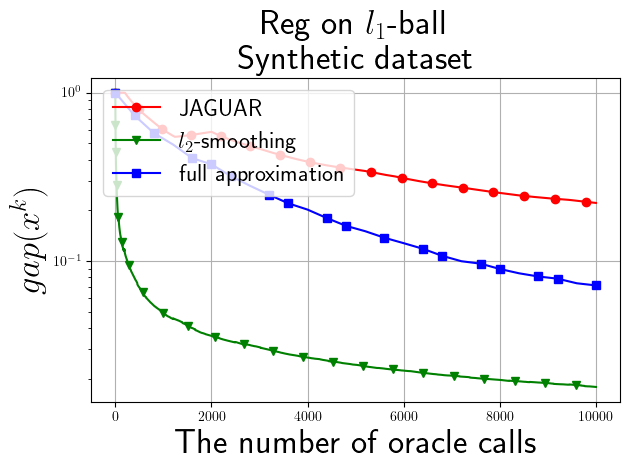

In [471]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_Reg_L1")

## Stochastic OPF FW SVM on L1-ball (Mushrooms)

In [531]:
func_name = "SVM"
sett = L1Ball(radius=1)
sigma = 1

d, args = init_experiment(func_name, dataset="Mushrooms", alpha=0.5)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [542]:
def learning_rate_jaguar(k):
    return 1 / (2*k + 10)

def learning_rate_lame(k):
    return 1 / (k + 50)

def learning_rate_turtle(k):
    return 1 / (k + 4)

In [543]:
def momentum_k(k):
    return 0.8 * k / (k + 10)

In [544]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [545]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [00:01<00:00, 37.08it/s]


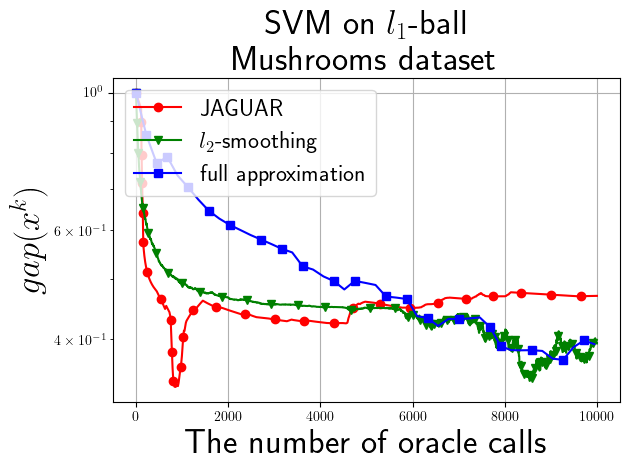

In [546]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_SVM_L1_Mushrooms")

## Stochastic OPF FW SVM on L1-ball (MNIST)

In [547]:
func_name = "SVM"
sett = L1Ball(radius=1)
sigma = 1

d, args = init_experiment(func_name, dataset="MNIST", alpha=2)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [558]:
def learning_rate_jaguar(k):
    return 1 / (k + 50)

def learning_rate_lame(k):
    return 1 / (k + 50)

def learning_rate_turtle(k):
    return 1 / (k + 2)

In [559]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [560]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [561]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=6 * 10**3, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.08it/s]


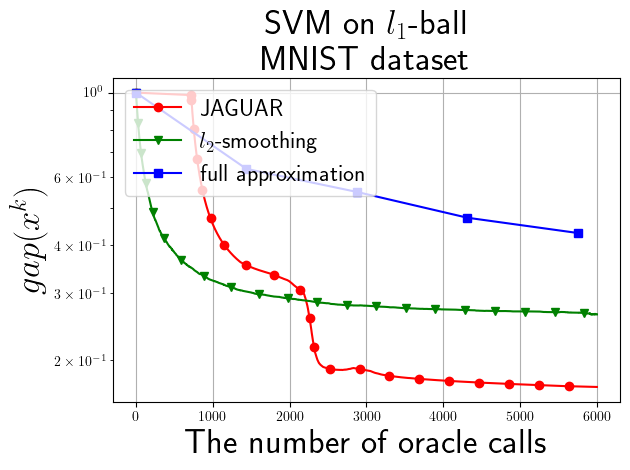

In [562]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_SVM_L1_MNIST")

## Stochastic TPF FW LogReg on L1-ball (Mushrooms)

In [199]:
func_name = "LogReg"
sett = L1Ball(radius=1)
sigma = 1

d, args = init_experiment(func_name, dataset="Mushrooms")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [214]:
def learning_rate_jaguar(k):
    return 1 / (k + 50)

def learning_rate_lame(k):
    return 1 / (k + 30)

def learning_rate_turtle(k):
    return 1 / (k + 10)

In [215]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [216]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [217]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=5 * 10**3, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 22/22 [00:09<00:00,  2.23it/s]


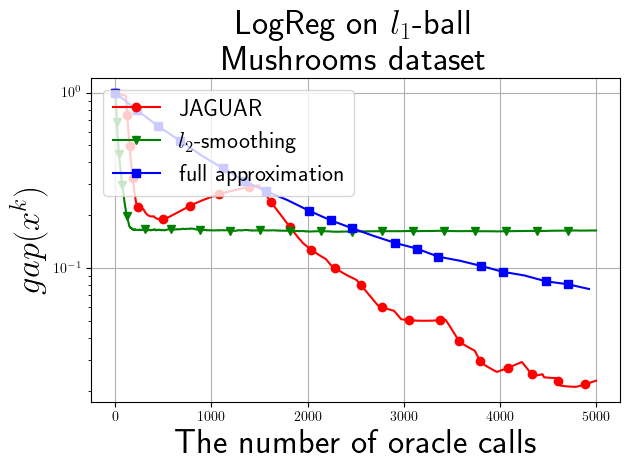

In [218]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_LogReg_L1_Mushrooms")

## Stochastic TPF FW LogReg on L1-ball (MNIST)

In [219]:
func_name = "LogReg"
sett = L1Ball(radius=1)
sigma = 1

d, args = init_experiment(func_name, dataset="MNIST")

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [237]:
def learning_rate_jaguar(k):
    return 1 / (k + 400)

def learning_rate_lame(k):
    return 1 / (k + 300)

def learning_rate_turtle(k):
    return 1 / (k + 2)

In [238]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [239]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [240]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=7 * 10**3, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 4/4 [01:10<00:00, 17.56s/it]


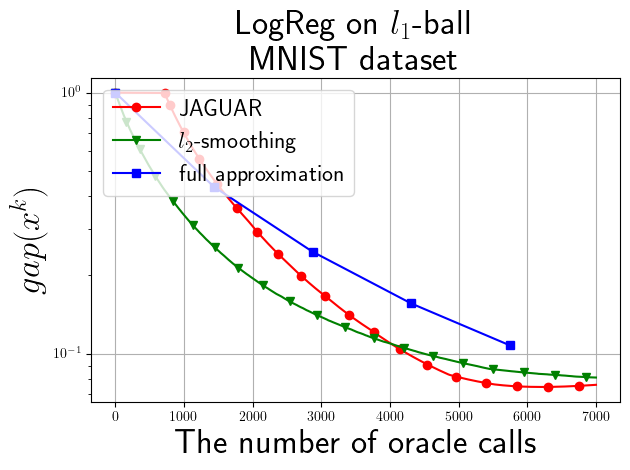

In [241]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_LogReg_L1_MNIST")

## Stochastic TPF FW Reg on L1-ball

In [242]:
func_name = "Reg"
sett = L1Ball(radius=1)
seed = 101
d = 200
L = 1000
mu = 1
sigma = 1

d, args = init_experiment(func_name, d=d, L=L, mu=mu, seed=seed)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [278]:
def learning_rate_jaguar(k):
    return 1 / (k + 100)

def learning_rate_lame(k):
    return 1 / (k + 6)

def learning_rate_turtle(k):
    return 1 / (k + 6)

In [279]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [280]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [281]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 25/25 [00:00<00:00, 62.57it/s]


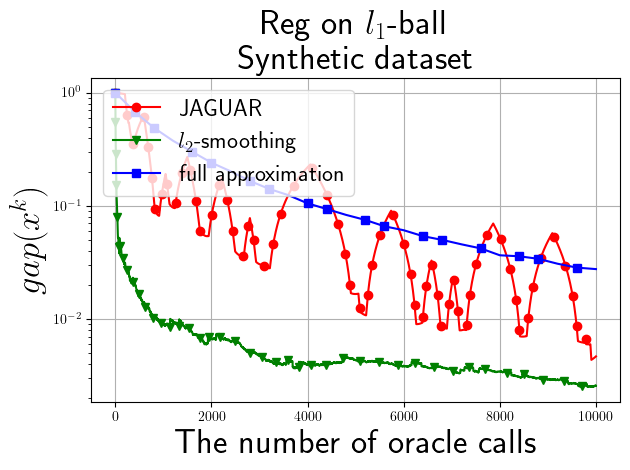

In [282]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_Reg_L1")

## Stochastic TPF FW SVM on L1-ball (Mushrooms)

In [324]:
func_name = "SVM"
sett = L1Ball(radius=1)
sigma = 1

d, args = init_experiment(func_name, dataset="Mushrooms", alpha=2)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [342]:
def learning_rate_jaguar(k):
    return 1 / (k + 1000)

def learning_rate_lame(k):
    return 1 / (k + 100)

def learning_rate_turtle(k):
    return 1 / (k + 20)

In [343]:
def momentum_k(k):
    return 0.95 * k / (k + 100)

In [344]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [345]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [00:01<00:00, 23.39it/s]


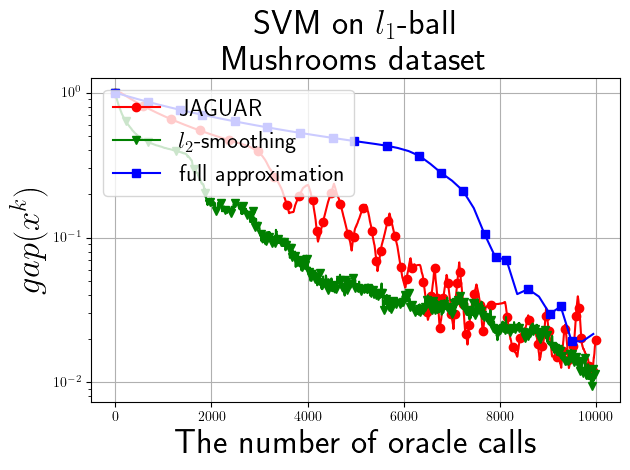

In [346]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_SVM_L1_Mushrooms")

## Stochastic TPF FW SVM on L1-ball (MNIST)

In [347]:
func_name = "SVM"
sett = L1Ball(radius=1)
sigma = 1

d, args = init_experiment(func_name, dataset="MNIST", alpha=2)

x_0 = np.random.random(size=d + 1)
x_0 = x_0 / np.linalg.norm(x_0)

In [358]:
def learning_rate_jaguar(k):
    return 1 / (k + 1000)

def learning_rate_lame(k):
    return 1 / (k + 10)

def learning_rate_turtle(k):
    return 1 / (k + 3)

In [359]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [360]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [361]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4, err="gap")
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [00:05<00:00,  1.05it/s]


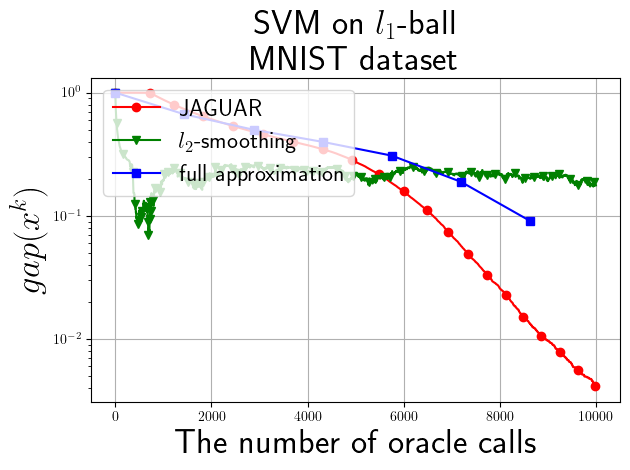

In [362]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_SVM_L1_MNIST")